# RECURRENT NEURAL NETWORKS (RNN)

Bizi üzecek kadar zordur!!

# Sequence Model

Sequence modeller zamana göre değişen modelleridr. (Mesela bir havaalanındaki yolcu sayısını ölçmek istersek bu yolcu sayısı zamanla değişecek modellerdir. )

Örneğin; Speech Recognition, Natural Language Process(NPL), Music Generation.

Konuşma Tanıma, Doğal Dil İşleme, Müzik Üretimi

Örnek verelim Apple Siri ve Google's Voice Search 

Yani y eksenimimzi zaman akışı olarak düşünelim. Sesimizi ise analiz edilecek veri olarak düşünelim.




# Recurrent Neural Networks

RNN short "memory"'e sahiptir. Diğer sinir ağlarına göre öne çıkan bir özelliktir. Gelecekle geçmişteki şeyleri bağdaştırır ve daha ileriyi predict veya classify edebiliyorlar. Eğittimiz datada önemli şeyleri hatırlayabiliyorlar. Hidden layer içinde kendi kendini besleyen zamansal memoryleri var. (Short). Hidden layerlar hem birbirinin arkasından outputları alır hem de meory de tuttukları bilgileri alırlar.

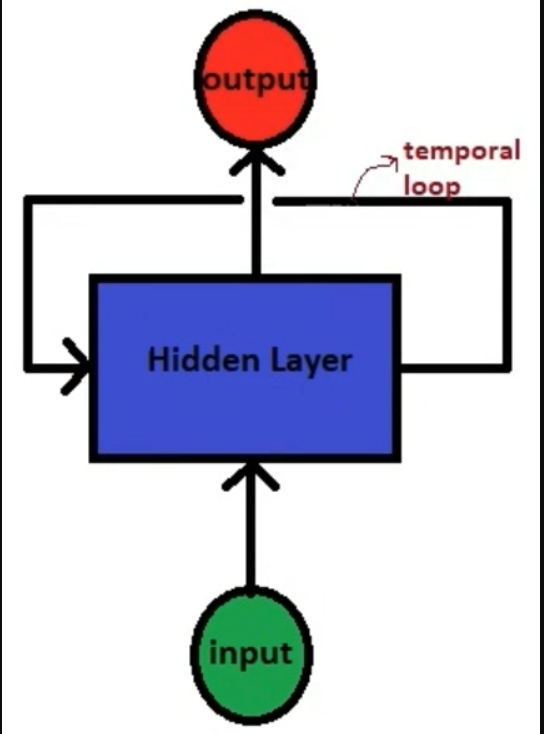

RNN gösterimi:

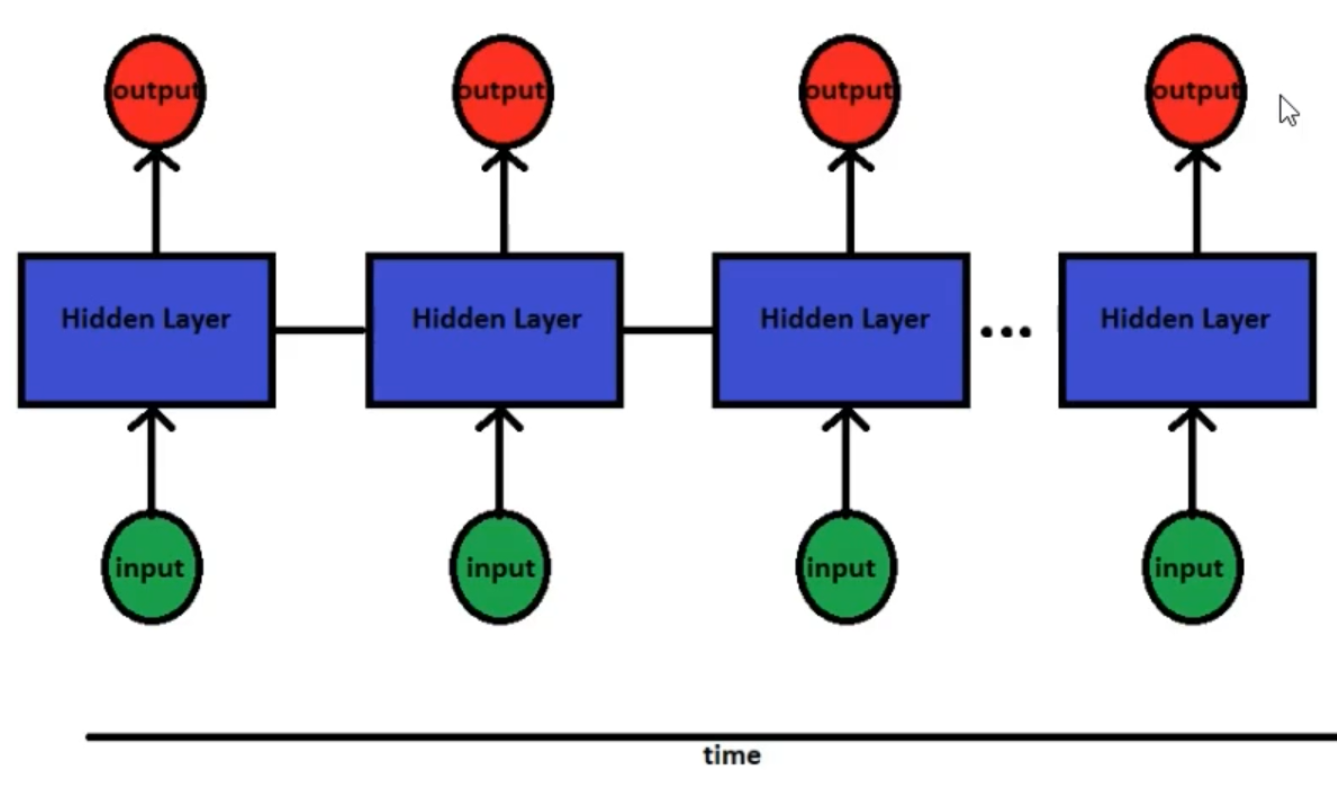

RNN Çeşitleri:

1.One to Many: Bir input var ve birden fazla output vardır.

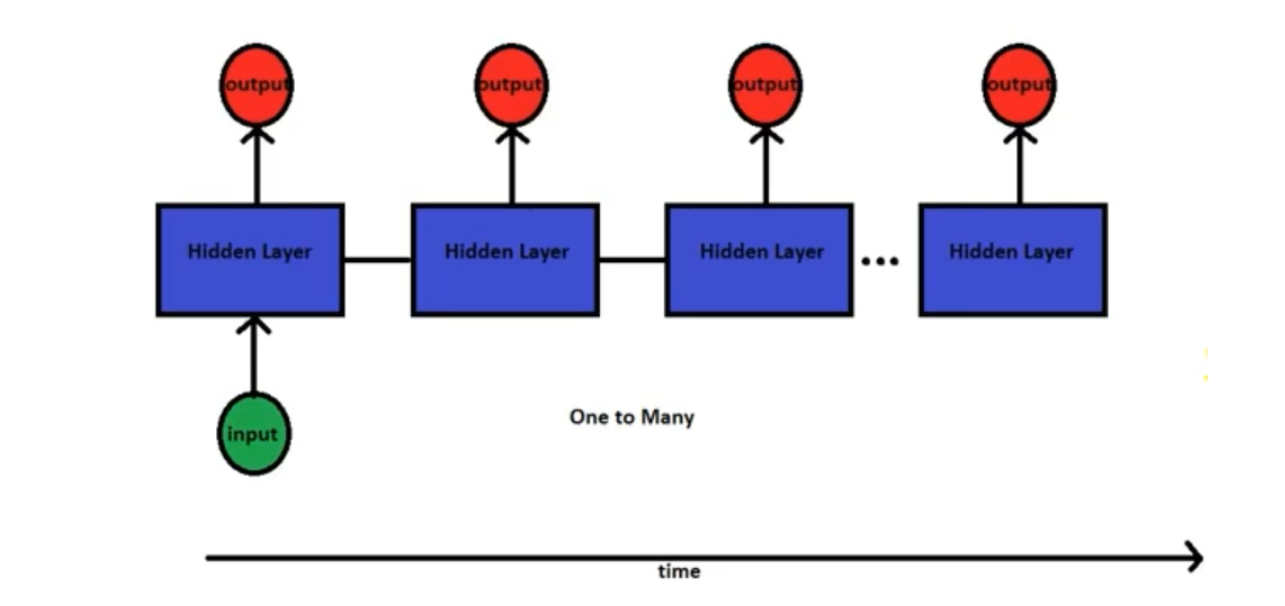

2.Many To One: Birden fazla input var ve bir output var.


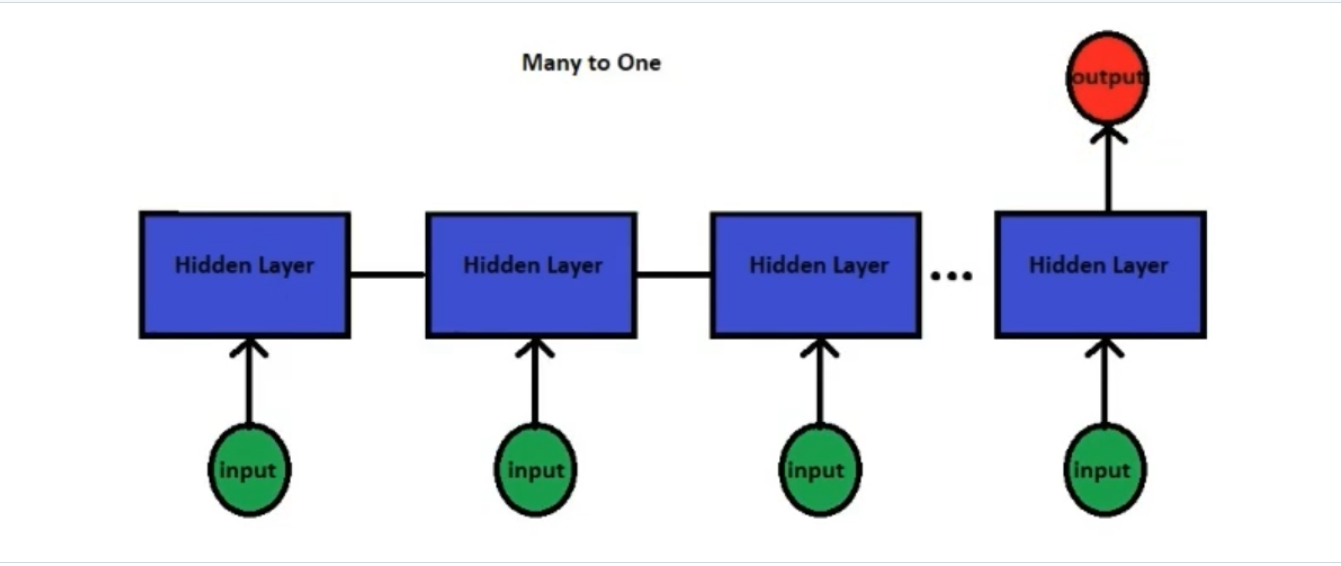

3.Many To Many: Birden fazla girdi ve birden fazla çıktı vardır.

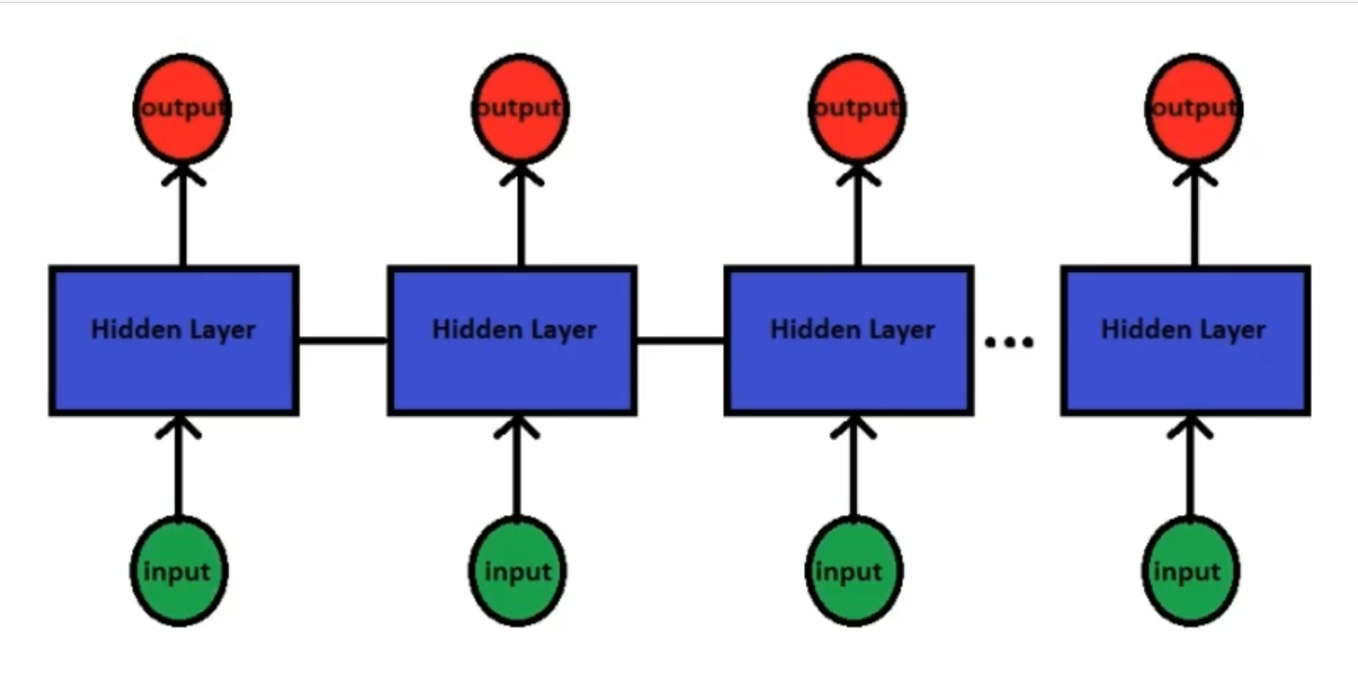

RNN vs LSTM


Rnn short term memory e sahiptir. LSTM ise long time memory e sahiptir.

Rnn'i Ann veya Cnn den ayıran temel farkın memory olduğunu belirtmiştik. Mesela Elimizde bir string ifade var. İlk dört hafe geldik, 5. harfin ne olacağını Ann bilemez çünkü memory bilgisi yoktur. Ama Rnn bunu söyleyebilir. 

Exploding Gradients: Gradients'in çok büyük olma durumudur. Gereksiz yere önemsiz weight değerlerine fazla önem kazandırılır.

Vanishing Gradients: Gradients in çok küçük olma durudur. Yavaş öğrenir.

Gradient: Costa göre weightteki değişim. (Updating variable aşamasında weigt bias a göre türev alınması durumudur.)

# Implementing RNN with Keras

Loading and Preprocessing Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#ımporting the traning set

dataset_train= pd.read_csv("Stock_Price_Train.csv")

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Datasetimiz borsa datasetidir. Open datasetimizin açılış değeridir. 

In [6]:
#Open sütununu array e çeviriyoruz.
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Verideki değerlerimizi 0-1 arasında normalize edebilmek için sklearn Kütüphanesinin MinMaxScaler sınıfını import ettikten sonra range= (0,1) arasında olmasını istediğimiz belirtiyoruz. ardından fit methodu 0,1 arasında çekiyor(fit ediyor) ve transform da bunu bir değere eşitliyor. 

In [7]:
#Feature Scaling (Normalizasyon)
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
train_scaled= scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

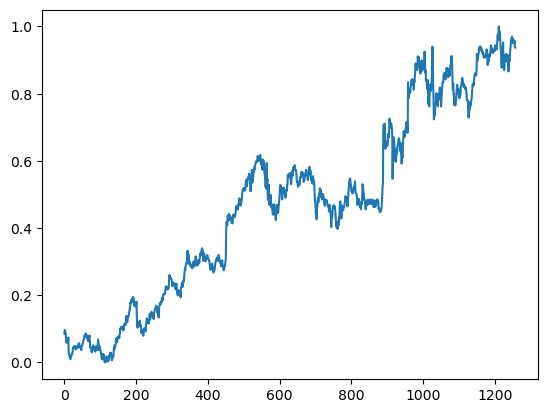

In [8]:
plt.plot(train_scaled)
plt.show()

Train datam var ve biz bunu öznitelik ve hedef değişkeni olarak ikiye ayırmalıyız. ilk 50 sample train et ve 50 den sonraki ilk sample i predict et ve bunu y_train içine at. Ardından 52. den itibaren 50 tane daha train et ve 103. değeri predict ettikten sonra Y_train içine at. Time step değiştirilebilir.x_train, y_train = np.array(x_train), np.array(y_train) satırında yapılanlar numpy array'e çevirme işlemidir.

In [9]:
#Creating a data structure with 50 times steps and 1 outputs
x_train= []
y_train=[]
timesteps= 50
for i in range(timesteps, 1258):
    x_train.append(train_scaled[i-timesteps: i, 0])
    y_train.append(train_scaled[i,0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

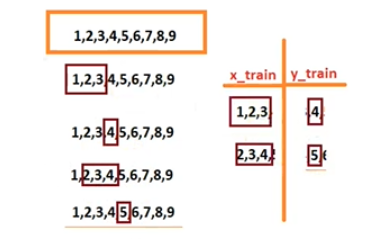

In [10]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
        0.05065481],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
        0.05214302],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
        0.05612397],
       ...,
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.96569685, 0.97510976, 0.95966962, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
x_train.shape


(1208, 50)

In [12]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [13]:
y_train.shape

(1208,)

# Create RNN Model

Şimdi bir model eğitip gelecek ile ilgili tahminler yapalım.



In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#initialising the RNN
regressor = Sequential()

#adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units=1))  #units=1 şeklinde 1 tane node eklenmiştir.

#compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 53ms/step - loss: 0.3390
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 0.1876
Epoch 3/100
38/38 [==============================] - 2s 65ms/step - loss: 0.1299
Epoch 4/100
38/38 [==============================] - 2s 58ms/step - loss: 0.1141
Epoch 5/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0875
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0774
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0590
Epoch 8/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0541
Epoch 9/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0469
Epoch 10/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0430
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0372
Epoch 12/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0328
Epoch 13/100
38/38 [=====

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


Gerekli kütüphaneleri import ettik.


regressor = Sequential()

Sequential'i Data sturcture olarak düşünebiliriz. Dense, SimpleRnn ve dropout gibi methodları layerları içinde topladığım bir constructor bir neural networks yapısıdr. Regressor adlı bir variable'a eşitleyip Sequenctial() methodunu çağırıyorum.




regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))


regressor.add(Dropout(0.2))


ilk katmanı eklemeye başlıyoruz, units: 50, aktşvasyon fonksiyoun tanh, returm_sequences="True" ifadesi RNN katmanının tüm zaman adımlarında bir çıktı döndürmesini sağlar. Bir sonraki adımlar için korunacak bir dizi çıktıyı korur. 
ardından input parametremizin yalnızca kullanacağımız kısmının shape'ini veriyoruz. Ardından nodelardan bir kısmını etkisiz hale getirmek için drop out methodu kullanılır.


# RNN Prediction and Visualization


Test edeceiğimz veriyi okutalım ve yükleyelim. 

In [15]:
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


Test verisetinde kullanacağımız veriseti sütununu bir değişkene atalım. "Open"

In [16]:
real_stock_price = dataset_test.loc[:,["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

Ardından bu Open öznitelik değerlerini 1-0 arasında normalize edelim. Tıpkı train datasına yaptığımız gibi.

In [17]:
#NORMALIZASYON
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

x_test adlı bir liste oluşturduk ve timescaled=70 değerini verdik. x_test listemin içine tıpkı yukarıda yaptığım gibi tahmin ettiğimiz değerleri predict edicez. Yani 71. sample ve 142.sample gibi.

1/1 [==============================] - 1s 588ms/step


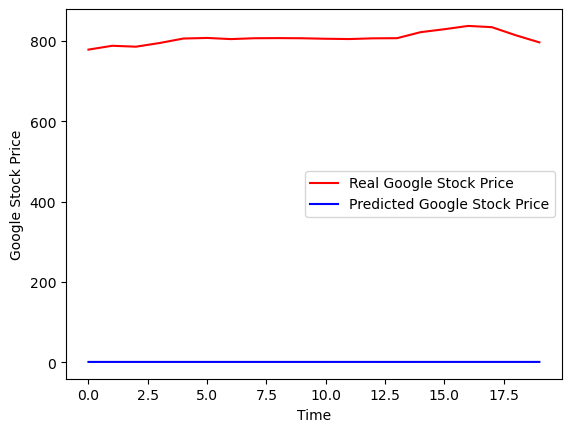

In [18]:
x_test = []
for i in range(timesteps, 70):
    x_test.append(inputs[i-timesteps:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predict_stock_price = scaler.inverse_transform(predicted_stock_price)

#visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# LONG SHORT TERM MEMORY (LSTMs)

LSTM : RNN in özelleşmiş bir yapısıdır.

LSTM de RNN den farklı oalrak Long Term memory vardır. 

LSTM Mimarisi:


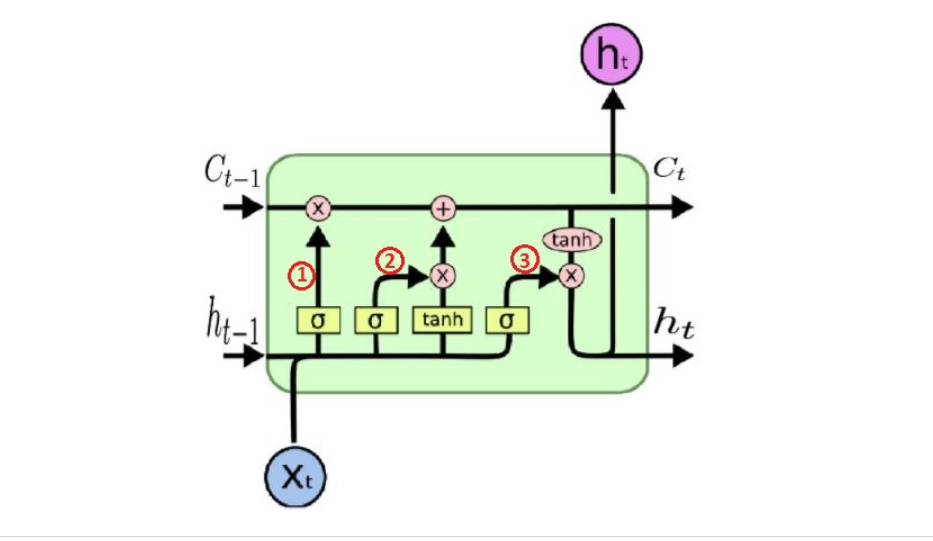

LSTM Mimarisi:

 x: scaling of information

 +: Adding information

 sigmoid layer. Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.

 tanh: activation function tanh. Tanh vanishing gradient(yavaş öğrenme - çok küçük gradient) problemini çözer. Çünkü parametreleri update ederken türev alıyorduk. Tanh'ın türevi hemen sıfır'a ulaşmaz.

 h(t-1): output of LSTM unit

 c(t-1): memory from previous LSTM unit

 X(t): input

 c(t): new updated memory

 h(t): output

 From c(t-1) to c(t) is memory pipeline. or only memory.

 Oklar vektör.

 h(t-1) ile X(t) birleşmiyor parallel iki yol olarak düşünebilirsiniz.
1 numaralı kısım: Forget gate: input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.

2 numaralı kısım: Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir.

3 numaralı kısım: Output gate: Hangi bilginin output olup olmayacağına karar verir.

# Implementing LSTM with Keras


Loading and Visualizing Data

Preprocessing Data

Create LSTM Model

Predictions and Visualising LSTM Model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error  #loss function

In [21]:
data = pd.read_csv("international-airline-passengers.csv", skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Datamız aylara göre bir havalanındaki yolcu sayılarının olduğu bir datasettir. Görselleştirip ardıdnan LSTM modeli ile tahimler yapacağız.

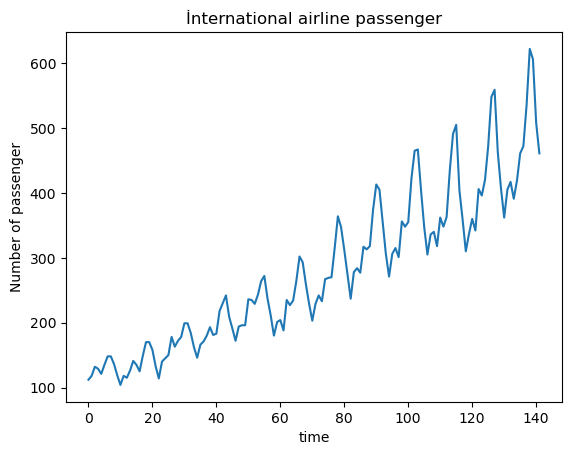

In [25]:
dataset = data.iloc[:,1].values #Yolcu sayılarını bir arraye çevirip
plt.plot(dataset) #ardından çizdiryoruz
plt.xlabel("time")
plt.ylabel("Number of passenger")
plt.title("İnternational airline passenger")
plt.show()

# LSTM Preprocessing Data




 reshape

 change type

 scaling

 train test split

 Create dataset

In [33]:

dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

dataset.reshape(-1,1) işlemi yapılmazsa (142,) şeklinde shape bilgisi olurdu. (142,) ve (142,1) aynı ifadelerdir. Fakat virgülden sonra 1 değeri yazmadığında bazı metodlarda boyutu anlayamaması gibi sorunlar oluşabiliyor. Bu nedenle dataset.reshape(-1,1) satırı ile (142,) ifadesinden (142, 1) ifadesine çevrim sağlanıyor.

dataset = dataset.astype("float32") satırında dataset içerisindeki değerleri float32'ye çeviriyoruz

In [34]:

#scaling
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

Tüm neural network'lerde scaling işlemi yapılmalıdır. Scaling işlemi ile hız artırımı sağlanır ve network'ün daha iyi sonuçlar verebilmesi sağlanır.

In [36]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {}".format(len(train),len(test)))

train size: 71, test size: 71


time Step ve her bir stepten sonra predict yapmasını beklediğimiz adımdır.

In [38]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
    
trainX = np.array(dataX)
trainY = np.array(dataY)

In [40]:

#reshape
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM Create Model


In [41]:
#model
model = Sequential()
model.add(LSTM(10, input_shape=(1,time_stemp))) #10 LSTM neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 3s 2ms/step - loss: 0.0076
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/50
60/60 [==============================

# LSTM Prediction and Visualization


In [42]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 3ms/step
Train Score: 0.03 RMSE
Test Score: 0.08 RMSE


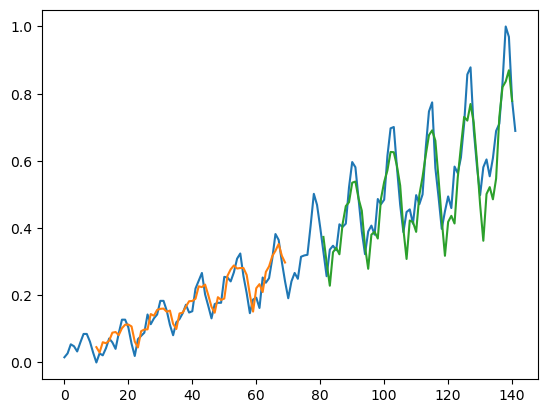

In [43]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()